<a href="https://colab.research.google.com/github/GAYATHRI-2002/MINI_PROJECT/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
print("Checking the shape of the dataset: ",df.shape)
print("The rows in dataset:",df.shape[0])
print("the columns in dataset:",df.shape[1])

Checking the shape of the dataset:  (1338, 7)
The rows in dataset: 1338
the columns in dataset: 7


In [13]:
df.isna().sum() #check null values

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [14]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


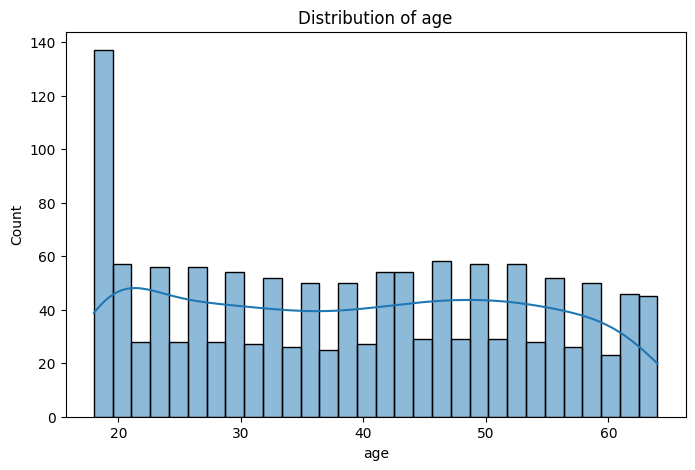

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of age")
plt.show()

In [18]:
"""###Seprating object datatypes and numeric datatypes"""

#Selecting all columns of object data type
df_object = df.select_dtypes(include="object")
#Selecting all columns of numerical data type
df_numeric = df.select_dtypes(exclude="object")

In [19]:
#checking distribution of data in each category
for column in df_object.columns:
  print(f"Unique values in {column} are {df[column].value_counts()}")
  print()

Unique values in sex are sex
male      676
female    662
Name: count, dtype: int64

Unique values in smoker are smoker
no     1064
yes     274
Name: count, dtype: int64

Unique values in region are region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



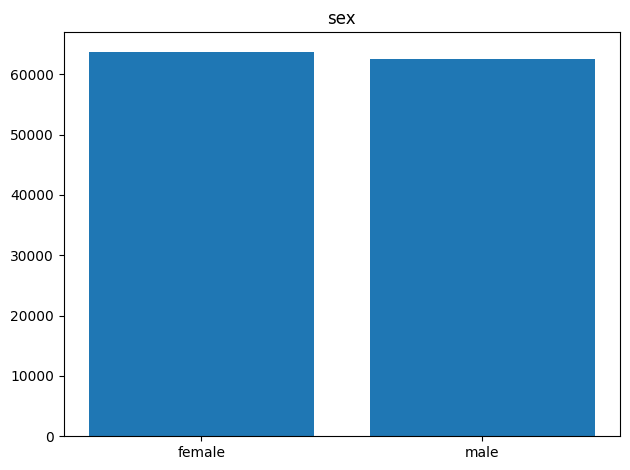

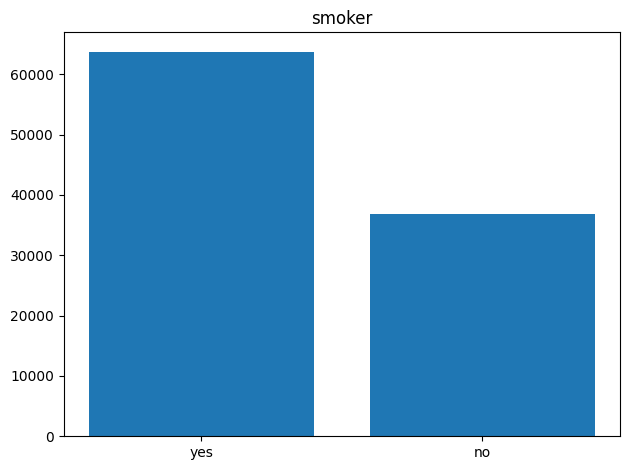

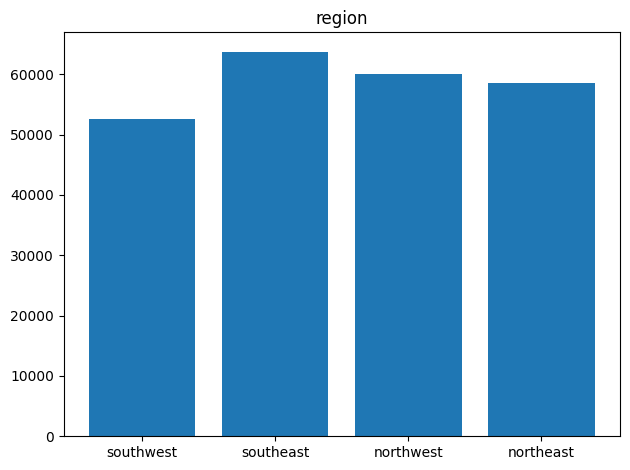

In [20]:
"""###Checking the distribution grphiclly"""

for column in df_object.columns:
  plt.bar(df[column], df['charges'])
  plt.title(column)
  plt.tight_layout()
  plt.show()

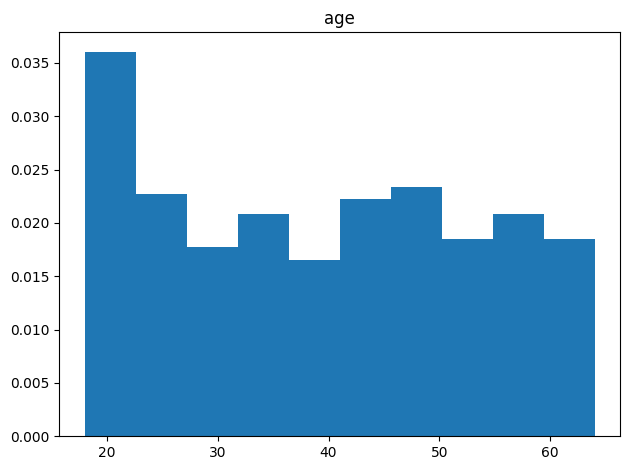

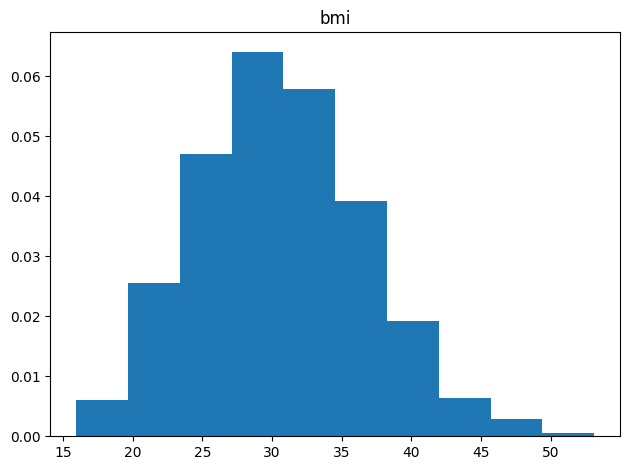

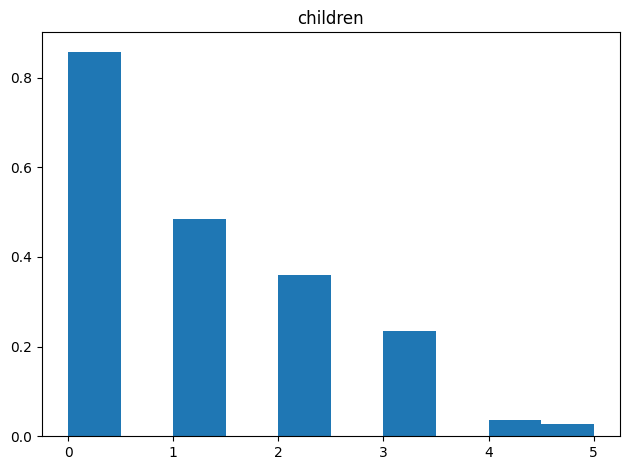

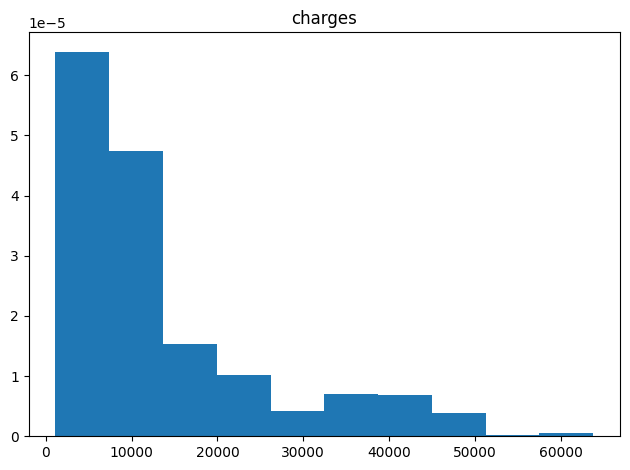

In [21]:
"""categories of 'Sex' and 'Region' column are is almost equally distributed, but smoker is not, as number of 'no' in 'smoker' columns is high, the ml algorith might be biased towards 'no' catrgory"""

#checking distribution of data in each numrical category
for column in df_numeric.columns:
  plt.hist(df[column], density=True)
  plt.title(column)
  plt.tight_layout()
  plt.show()

In [22]:
"""###most of the numerical columns are normally distributued

#DATA PREPROCESSING

TRANSFORMING OBJECT COLUMNS TO NUMERICAL COLUMNS

1. BY ONE HOT ENCODING FROM SKLEARN LIBRARY
2. BY PD.GET_DUMMIES METHOD
3. BY USING MAP FUNCTION
"""

for column in df_object:
  print(f"Unique values in {column} column are {df[column].unique()}")
  print()

Unique values in sex column are ['female' 'male']

Unique values in smoker column are ['yes' 'no']

Unique values in region column are ['southwest' 'southeast' 'northwest' 'northeast']



In [23]:
"""USING GET DUMMIES METHOD TO ENCODE 'SEX' AND 'SMOKER' AND MAP TO ENCODE 'REGION'"""

#Creating a new column where insted of male or female it would show if male is true or false
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

In [24]:
"""DOING THE SAME FOR SMOKER COLUMN"""

#Creating a new column where insted of male or female it would show if male is true or false
df = pd.get_dummies(df, columns=['smoker'], drop_first=True)

In [25]:
"""USING MAP FUNCTION TO ENCODE REGION"""

df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
"""Mapping
'southwest' as 0,
'southeast' as 1,
'northwest' as 2,
'northeast' as 3
"""

df['region'] = df['region'].map({'southwest':0, 'southeast' : 1, 'northwest' : 2, 'northeast' : 3 })


<Axes: >

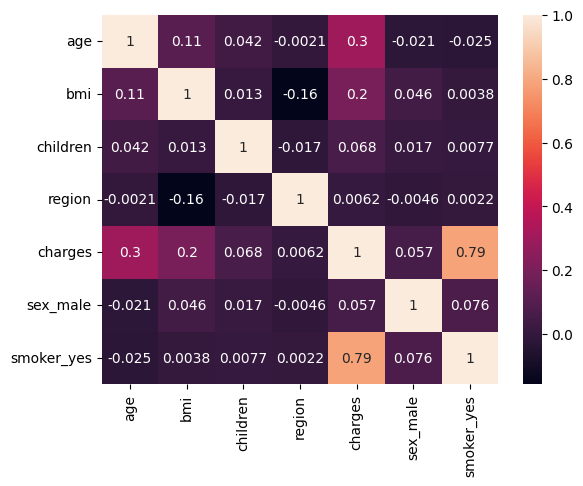

In [29]:
#Checking dataset afer encoding
df

#Checking correlation of columns with each other
df.corr()

#Checing correlation with a heatmap for visualization
sns.heatmap(df.corr(), annot=True)
#there is a strong corelation between smokers and charges because it is 79%

In [28]:
#Checking correlation with charges column to each column
corelation_with_charges = df.corr()['charges']
corelation_with_charges


,charges
age,0.299008
bmi,0.198341
children,0.067998
region,0.006208
charges,1.000000
sex_male,0.057292
smoker_yes,0.787251


In [30]:
"""VISUALLY HECKING THE CORRELATION WITH CHARGES COLUMNS"""

#Creating x axis
x_axis = corelation_with_charges.index


In [31]:
#Creating y axis
y_axis = [corelation_with_charges[i] for i in corelation_with_charges.index]

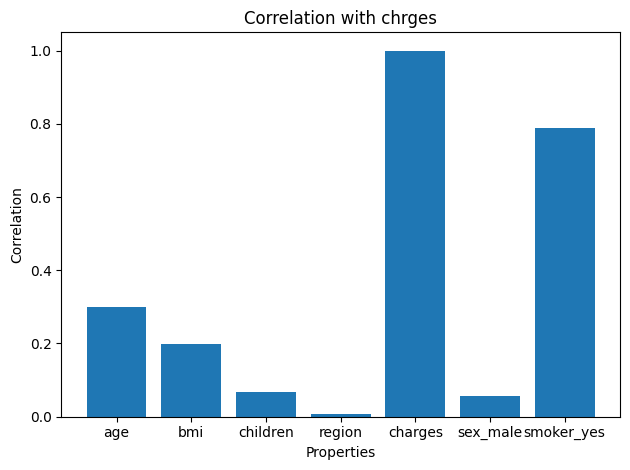

In [32]:
#Plotting the graph
plt.bar(x_axis, y_axis)
plt.xlabel("Properties")
plt.ylabel("Correlation")
plt.title("Correlation with chrges")
plt.tight_layout()
plt.show()

In [33]:
"""We can see Smoker, Age and BMI are very corelated with charges but children, region and sex are not so correlated.

#SPLITTING DATA INTO DEPENDENT ND INDEPENDENT VARIABLE
"""

X = df.drop('charges', axis=1)
y = df['charges']


In [34]:
"""#SPLITTING DATA INTO TRAIN AND TEST"""

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

#Checking shape of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


In [35]:
"""Implementing Decision Tree"""

#Importing algorithm
from sklearn.tree import DecisionTreeRegressor

#Creating instance
decision_tree_model = DecisionTreeRegressor()

#Fitting data
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
"""Prediction and scoring"""

#Predicting with test data
decision_tree_model_prediction = decision_tree_model.predict(X_test)

#checking score

#Train model score
decision_tree_training_set_score = decision_tree_model.score(X_train, y_train)
print(f"Score with training model is: {decision_tree_training_set_score}")

#Test model score
decision_tree_test_set_score = decision_tree_model.score(X_test, y_test)
print(f"Score with test model is: {decision_tree_training_set_score}")

#Full model score
decision_tree_training_set_score = decision_tree_model.score(X, y)
print(f"Score with full model is: {decision_tree_training_set_score}")

Score with training model is: 0.9982060600117458
Score with test model is: 0.9982060600117458
Score with full model is: 0.9430561785909395
